# Imports

In [2]:
import pandas as pd
import  numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

# Load dataset

In [3]:
data = pd.read_csv('week3_challenge.csv')

In [ ]:
data.head()
#Data head not shown in this notebook because data is confidential

In [5]:
data1 = data.dropna(thresh = 0.7*len(data),axis = 1)

In [110]:
dropped_columns = list(data.columns.difference(data1.columns))
len(dropped_columns)

18

In [ ]:
data1.head()
#Data head not shown in this notebook because data is confidential

In [17]:
data1.dtypes

Unnamed: 0                                      int64
createdAt_Month                                 int64
Reason                                         object
application_id                                 object
SystemCustomerID                                int64
SystemLoanID                                    int64
income_source                                  object
income_verified                                  bool
next_loan_number                                int64
country                                        object
DecisionFlag                                   object
Product                                        object
Income                                        float64
ID                                             object
ApplicationID                                  object
__v                                           float64
CompletedAt                                    object
demofeatures_net_income_band                  float64
demofeatures_appweek        

In [55]:
data2 = data1.select_dtypes(include = ['int64', 'float64'])

In [ ]:
data2.head()
#Data head not shown in this notebook because data is confidential

In [114]:
data2 = data2.drop(['Unnamed: 0'], axis=1)

In [115]:
remaining_columns = len(data2.columns)
remaining_columns

248

In [57]:
df = data2.fillna(0)

In [58]:
df.isnull().values.any()

False

In [103]:
len(df)

11993

# Scaling the data

In [74]:
# get features
features = list(df)
x = df.loc[:, features].values

In [76]:
# get target variables
y = df.loc[:,['predictedIncome']].values

In [78]:
# standardize features
x = StandardScaler().fit_transform(x)

# PCA Projection

In [81]:
# create pca
pca = PCA(n_components=5)

In [82]:
# fit the data to the model
principalComponents = pca.fit_transform(x)

In [101]:
principalComponents

array([[ 4.22097372, -2.27027382,  0.75739001, -1.59926904,  4.2340764 ],
       [13.46490735, -3.68577513, -2.14244662, -0.88995448, -0.21966551],
       [ 5.90034119, -2.36806079,  0.09352481,  0.48479327,  0.24120983],
       ...,
       [-2.45714955, -0.06481825, -0.25267048,  1.26737218, -0.46362186],
       [ 2.40897618, -1.60935472, -0.239542  ,  0.49176687, -1.52314131],
       [-1.1674063 , -0.0961666 ,  0.59432427,  1.64451921, -0.2591927 ]])

In [85]:
# create dataframe containing principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [86]:
# display principal components
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,4.220974,-2.270274,0.757390,-1.599269,4.234076
1,13.464907,-3.685775,-2.142447,-0.889954,-0.219666
2,5.900341,-2.368061,0.093525,0.484793,0.241210
3,-1.884293,1.370643,-0.221311,3.305450,0.302539
4,2.631881,1.782549,0.575727,-2.894215,-0.847431


In [87]:
finalDf = pd.concat([principalDf, df[['predictedIncome']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,predictedIncome
0,4.220974,-2.270274,0.757390,-1.599269,4.234076,105872.674499
1,13.464907,-3.685775,-2.142447,-0.889954,-0.219666,34421.220891
2,5.900341,-2.368061,0.093525,0.484793,0.241210,14447.944277
3,-1.884293,1.370643,-0.221311,3.305450,0.302539,52952.581832
4,2.631881,1.782549,0.575727,-2.894215,-0.847431,31577.275467


# Explained Variance

In [88]:
pca.explained_variance_ratio_

array([0.3510669 , 0.09311398, 0.03786533, 0.03341305, 0.02734513])

In [89]:
pca.explained_variance_ratio_.sum()

0.5428043836101796

# K-means Clustering

In [90]:
# declare a Kmeans instance with 3 classes
model = KMeans(n_clusters=3)

In [92]:
# fit data 
model.fit(finalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [98]:
# get clusters
clusters = model.predict(finalDf)

In [99]:
print(clusters)

[2 1 1 ... 0 1 1]


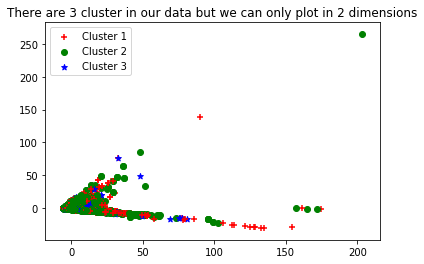

In [102]:
# plot based on cluster
for i in range(len(clusters)):
    if clusters[i] == 0:
        c1 = plt.scatter(principalComponents[i, 0], principalComponents[i, 1], c='r', marker='+')
    elif clusters[i] == 1:
        c2 = plt.scatter(principalComponents[i, 0], principalComponents[i, 1], c='g', marker='o')
    elif clusters[i] == 2:
        c3 = plt.scatter(principalComponents[i, 0], principalComponents[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('There are 3 cluster in our data but we can only plot in 2 dimensions')
plt.show()

# Reconnecting clusters to original dataframe

In [105]:
df['clusters'] = clusters

In [ ]:
df.head()
#Data head not shown in this notebook because data is confidential

In [109]:
mean_income = df.groupby('clusters')['Income'].mean()
std_income=df.groupby('clusters')['Income'].std()
print(mean_income,std_income,sep='/n')

clusters
0     66319.417706
1     29134.498280
2    126003.314855
Name: Income, dtype: float64/nclusters
0     70543.324367
1     35141.328442
2    113024.192490
Name: Income, dtype: float64
